# **1. Загрузка пакетов, библиотек и файлика**

In [1]:
import pandas as pd # пакет (строится поверх numpy)
import numpy as np # библиотека
from pandas import read_csv

In [ ]:
df=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\Train.csv')

In [8]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


# **2. Кодируем данные**

**1. Удаляем ненужный столбец 'ID'**

In [9]:
df.drop('ID',axis=1,inplace=True)

**2. Переименовываем столбцы на русский язык**

In [10]:
df.rename(columns={'Gender': 'Пол', 'Ever_Married': 'Семейное_положение',
                   'Age': 'Возраст', 'Graduated': 'Высшее_образование',
                   'Profession': 'Профессия', 'Work_Experience': 'Опыт_работы',
                   'Spending_Score': 'Уровень_расходов', 'Family_Size': 'Размер_семьи',
                   'Var_1': 'Анонимная_категория', 'Segmentation': 'Целевая_категория'
                  },inplace=True)

**3. Исследуем данные**

In [17]:
df.Профессия.value_counts()

Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: Профессия, dtype: int64

In [18]:
df.Профессия.unique()

array(['Engineer', 'Healthcare', nan, 'Executive', 'Marketing', 'Doctor',
       'Artist', 'Lawyer', 'Entertainment', 'Homemaker'], dtype=object)

In [7]:
df.nunique()

Пол                     2
Семейное_положение      2
Возраст                67
Высшее_образование      2
Профессия               9
Опыт_работы            15
Уровень_расходов        3
Размер_семьи            9
Анонимная_категория     7
Целевая_категория       4
dtype: int64

In [8]:
df.isna().sum()

Пол                      0
Семейное_положение      50
Возраст                  0
Высшее_образование      24
Профессия               38
Опыт_работы            269
Уровень_расходов         0
Размер_семьи           113
Анонимная_категория     32
Целевая_категория        0
dtype: int64

In [9]:
df.dtypes

Пол                     object
Семейное_положение      object
Возраст                  int64
Высшее_образование      object
Профессия               object
Опыт_работы            float64
Уровень_расходов        object
Размер_семьи           float64
Анонимная_категория     object
Целевая_категория       object
dtype: object

**4. Кодируем столбцы адресно (т.е. каждому значению в столбце присваиваем конкретное число)**

**Пол**

In [26]:
df['Пол'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df['Пол']=np.where(df['Пол']=='Male',1,0)

**Анонимная_категория**

In [39]:
df['Анонимная_категория'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [17]:
df['Анонимная_категория']= np.where(df['Анонимная_категория']=='Cat_1',1,
                          (np.where(df['Анонимная_категория']=='Cat_2',2,
                          (np.where(df['Анонимная_категория']=='Cat_3',3,
                          (np.where(df['Анонимная_категория']=='Cat_4',4,
                          (np.where(df['Анонимная_категория']=='Cat_5',5,
                          (np.where(df['Анонимная_категория']=='Cat_6',6,
                          (np.where(df['Анонимная_категория']=='Cat_7',7,np.nan)))))))))))))

# **3. Визуализация пропусков**

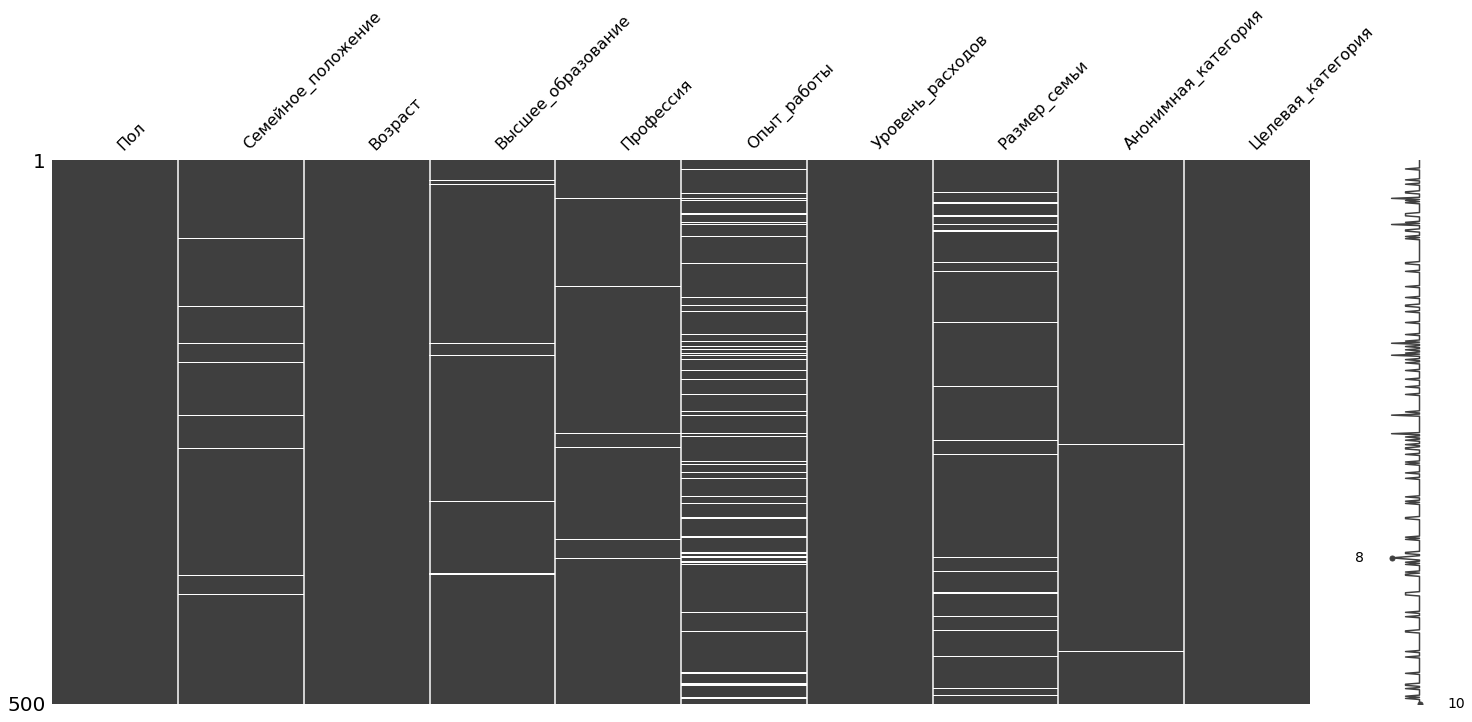

In [19]:
import missingno as msno # 
ах= msno.matrix(df.sample(500))

In [27]:
df.shape

(2627, 10)

In [20]:
df.to_csv('TEST_df(nan_не_удалены).csv')

# **4. Сохраняем данные в файл (будут 2 файла dropna и fillna)**

**1. Удаляем строки с NaN (просто удаляем и все)**

In [28]:
df_dropna = df.dropna()

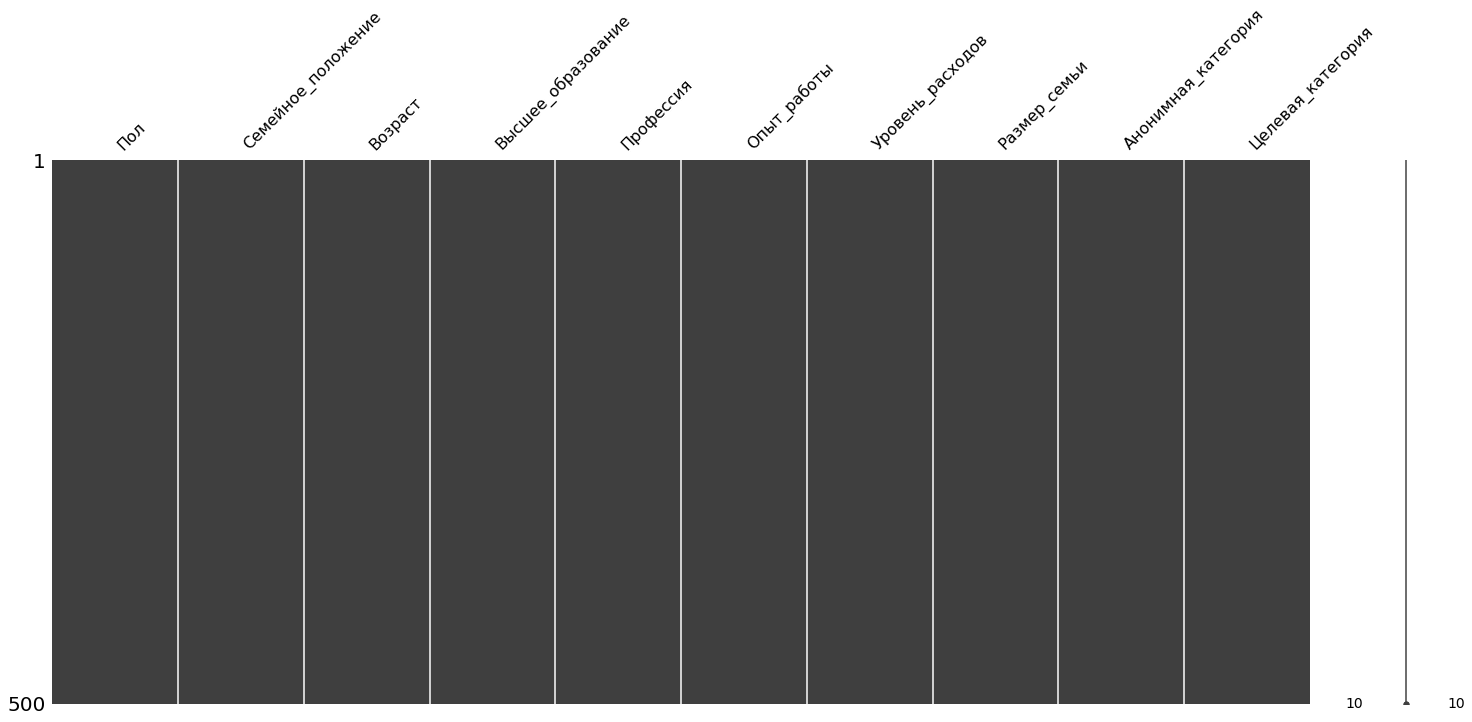

In [29]:
import missingno as msno # 
ах= msno.matrix(df_dropna.sample(500))

In [30]:
df_dropna.shape

(2154, 10)

In [31]:
df_dropna.Целевая_категория.value_counts()

1    692
4    631
2    450
3    381
Name: Целевая_категория, dtype: int64

In [52]:
1757-1572

185

**Сохраняем в файл:**

In [53]:
df_dropna.to_csv('TEST_cleared_dropna.csv')

**2. Заполняем NaN значения соседними значениями**

In [57]:
df_fillna = df

In [58]:
df_fillna = df_fillna.sort_values(by=['Целевая_категория','Возраст',])

In [60]:
df_fillna['Семейное_положение'].fillna(method='ffill', inplace=True)

In [62]:
df_fillna = df_fillna.sort_values(by=['Целевая_категория','Возраст','Семейное_положение'])

In [63]:
df_fillna['Высшее_образование'].fillna(method='ffill', inplace=True)

In [65]:
df_fillna['Профессия'].fillna(method='ffill', inplace=True)

In [67]:
df_fillna['Размер_семьи'].fillna(method='ffill', inplace=True)

In [69]:
df_fillna['Анонимная_категория'].fillna(method='ffill', inplace=True)

In [71]:
df_fillna['Опыт_работы'].fillna(method='ffill', inplace=True)

In [ ]:
df_fillna = df_fillna.sort_values(by=['Целевая_категория','Возраст'])

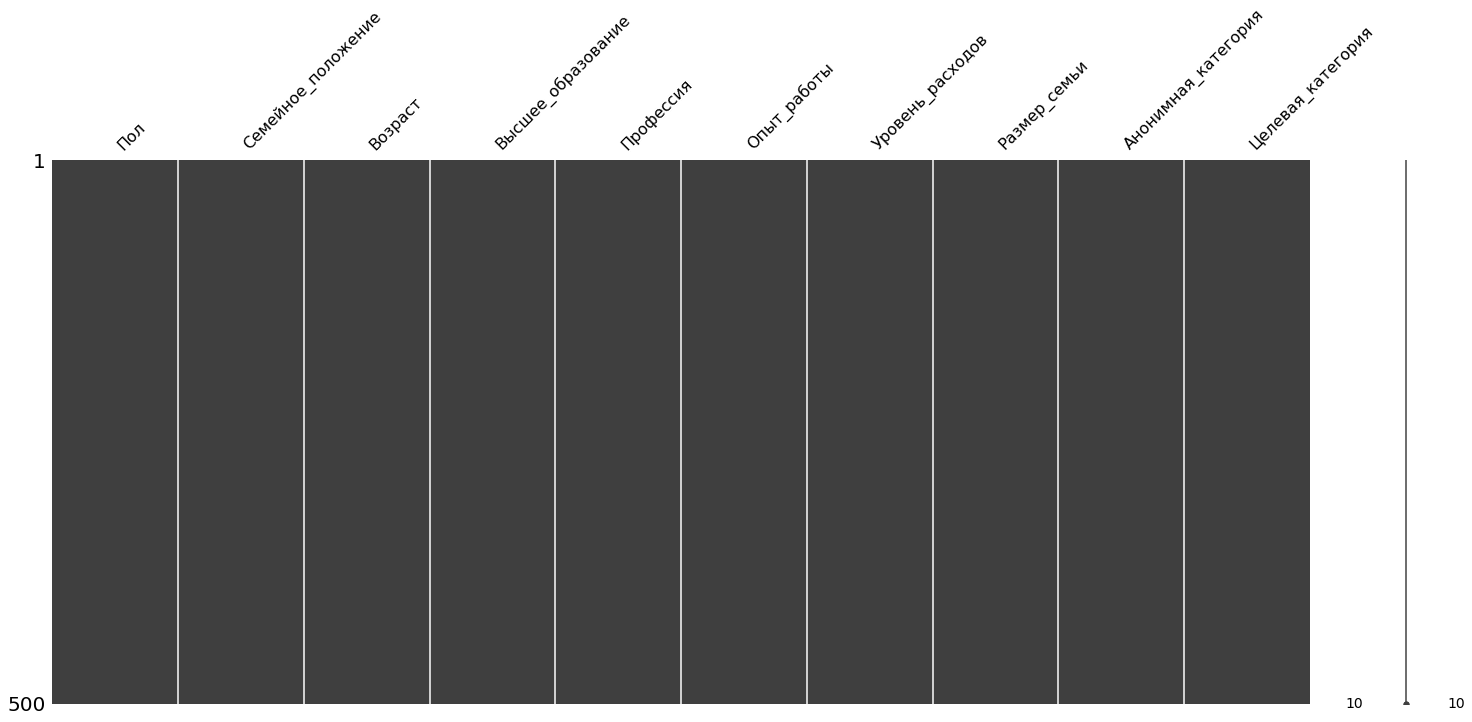

In [72]:
import missingno as msno # 
ах= msno.matrix(df_fillna.sample(500))

In [80]:
df_fillna.shape

(8067, 10)

In [79]:
df_fillna.isna().sum()

Пол                    0
Семейное_положение     0
Возраст                0
Высшее_образование     0
Профессия              0
Опыт_работы            0
Уровень_расходов       0
Размер_семьи           0
Анонимная_категория    0
Целевая_категория      0
dtype: int64

In [78]:
df_fillna = df_fillna.dropna()

**Сохраняем в файл:**

In [81]:
df_fillna.to_csv('Train_cleared_fillna.csv')

In [ ]:
================================================================================================================

# **Проверка наличия противоречивых даных:**

In [31]:
df=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\TEST_df(nan_не_удалены).csv')

In [32]:
df=df.filter(regex='^(?!.*Unnamed).*$')

In [33]:
array = df.values
array
X = array[:,0:9]
Y = array[:,9]

In [34]:
df.Целевая_категория.value_counts()

1    846
4    759
2    550
3    472
Name: Целевая_категория, dtype: int64

In [35]:
df.isna().sum()

Пол                      0
Семейное_положение      50
Возраст                  0
Высшее_образование      24
Профессия               38
Опыт_работы            269
Уровень_расходов         0
Размер_семьи           113
Анонимная_категория     32
Целевая_категория        0
dtype: int64

In [36]:
df = df.dropna(how='any')

In [37]:
df.Целевая_категория.value_counts()

1    692
4    631
2    450
3    381
Name: Целевая_категория, dtype: int64

In [93]:
df.columns

Index(['Пол', 'Семейное_положение', 'Возраст', 'Высшее_образование',
       'Профессия', 'Опыт_работы', 'Уровень_расходов', 'Размер_семьи',
       'Анонимная_категория', 'Целевая_категория'],
      dtype='object')

In [38]:
d = df.drop_duplicates()

In [39]:
d.Целевая_категория.value_counts()

1    686
4    621
2    450
3    377
Name: Целевая_категория, dtype: int64

In [40]:
df.shape

(2154, 10)

In [41]:
df_ = df.drop(columns='Целевая_категория') 

In [42]:
df_.shape

(2154, 9)

In [43]:
df_ = df_.drop_duplicates()

In [44]:
df_.shape

(2085, 9)

In [45]:
df.shape[0] - df_.shape[0]

69

In [46]:
df_L=df.drop(columns='Целевая_категория')

In [47]:
df_R = df['Целевая_категория']

In [48]:
df_R

0       2
1       1
3       2
5       3
6       4
       ..
2621    4
2622    2
2623    1
2625    3
2626    1
Name: Целевая_категория, Length: 2154, dtype: int64

In [49]:
df_L.shape

(2154, 9)

In [50]:
df_L = df_L.drop_duplicates()

In [51]:
df_L.shape

(2085, 9)

In [52]:
df_clear = pd.merge(df_L, df_R, left_index=True, right_index=True)

In [54]:
df_clear

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория
0,0,1.0,36,1.0,4.0,0.0,3,1.0,6.0,2
1,1,1.0,37,1.0,2.0,8.0,2,4.0,6.0,1
3,1,1.0,59,0.0,7.0,11.0,1,2.0,6.0,2
5,1,1.0,47,1.0,5.0,0.0,1,5.0,4.0,3
6,1,1.0,61,1.0,5.0,5.0,3,3.0,6.0,4
...,...,...,...,...,...,...,...,...,...,...
2621,0,0.0,35,1.0,3.0,1.0,3,2.0,6.0,4
2622,1,0.0,29,0.0,2.0,9.0,3,4.0,6.0,2
2623,0,0.0,35,1.0,5.0,1.0,3,1.0,6.0,1
2625,1,1.0,47,1.0,7.0,1.0,1,5.0,4.0,3


In [55]:
df_clear.to_csv('Test_cleared_!!!!!!!!.csv')

In [ ]:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++